# Project Proposal: Crime Rates in Kitsilano & Hastings-Sunrise

## Introduction

Vancouver has always been deemed a relatively safe city; however, crime rates have been increasing in recent years.[2] Though Vancouver is a safe place to live, there are some neigborhoods that have significantly higher crime rates than other areas. 

In this project, we want to compare the mean crime rates in Kitsilano and Hastings-Sunrise from 2003 to 2022. We will be performing a t-test to compare the crime rates of the two neighborhoods. The dataset we selected, provided by GeoDASH, is extracted from the PRIME BC Police Records Management System (RMS) and it contains crime data on a year-by-year basis which began in 2003.[1] This data also uses the ‘All Offence’ reporting method along with the condition of ‘Founded’ incidents, which means that the incidents were determined after the police investigation that the violation had occurred.[1]

We will test the hypothesis: 
$$H_0: \mu_{\text{Kitsilano}} - \mu_{\text{Hastings-Sunrise}} = 0$$ $$H_1: \mu_{\text{Hastings-Sunrise}} - \mu_{\text{Kitsilano}} \neq 0$$

using the following test statistic:
$$
T = \frac{\bar{x}_{\text{Hastings-Sunrise}} - \bar{x}_{\text{Kitsilano}}}{\sqrt{\frac{s^2_{\text{Hastings-Sunrise}}}{n_1}+\frac{s^2_{\text{Kitsilano}}}{n_2}}}
$$

where $\bar{x}_{\text{Hastings-Sunrise}}$ and $\bar{x}_{\text{Kitsilano}}$ are the sample means of crime rates from 2003 to 2022 for Hastings-Sunrise and Kitsilano, respectively; $s^2_{\text{Hastings-Sunrise}}$ and $s^2_{\text{Kitsilano}}$ are the sample variances for the Hastings-Sunrise and Kitsilano neighborhoods, respectively; and $n_1$ and $n_2$ are the sample size for Hastings-Sunrise and Kitsilano neighborhoods, respectively. 


The variables included in this dataset are:

1. <b>TYPE:</b> The type of crime activities
2. <b>YEAR:</b>  Indicates the year when the reported crime activity occurred 
3. <b>MONTH:</b>  Indicates the month when the reported crime activity occurred 
4. <b>DAY:</b>  Indicates the day of the month when the reported crime activity occurred 
5. <b>HOUR:</b>  Indicates the hour when the reported crime activity occurred 
6. <b>MINUTE:</b>  Indicates the minute when the reported crime activity occurred 
7. <b>HUNDRED_BLOCK:</b>  Generalised location of the reported crime activity
8. <b>NEIGHBOURHOOD:</b>  The VPD uses the Statistics Canada definition of neighbourhoods within municipalities.
9. <b>X:</b>  Coordinate projected in UTM Zone 10
10. <b>Y:</b>  Coordinate projected in UTM Zone 10


## Preliminary Results

In [47]:
library(tidyverse)
library(repr)
library(digest)
library(infer)
library(gridExtra)
library(taxyvr)
library(cowplot)

First, we read the data from the web into R.

In [50]:
crime_data <- read_csv("https://raw.githubusercontent.com/Git-Over-Here/STAT-201-Group-Project/main/combined.csv")

head(crime_data)

#print("The total number of crimes observed is: ") nrow(crime_data)

Warning message:
“One or more parsing issues, see `problems()` for details”
Rows: 70996 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD
dbl (7): YEAR, MONTH, DAY, HOUR, MINUTE, X, Y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Break and Enter Commercial,2018,5,16,17,0,10XX BOUNDARY RD,Hastings-Sunrise,498275.6,5458125
Break and Enter Commercial,2018,2,27,21,40,11XX ROSSLAND ST,Hastings-Sunrise,496692.0,5458066
Break and Enter Commercial,2012,9,25,22,33,13XX BOUNDARY RD,Hastings-Sunrise,498274.2,5457717
Break and Enter Commercial,2006,5,12,20,0,13XX BOUNDARY RD,Hastings-Sunrise,498274.3,5457739
Break and Enter Commercial,2006,5,13,20,58,13XX BOUNDARY RD,Hastings-Sunrise,498274.3,5457739
Break and Enter Commercial,2006,7,28,18,0,13XX BOUNDARY RD,Hastings-Sunrise,498274.3,5457739


Then, we clean the data by filtering out NAs in the dataset and selecting the columns that we are interested in, which are "TYPE", "YEAR" and "NEIGHBOURHOOD".

In [51]:
filtered_crime <- crime_data %>%
    filter(!is.na(YEAR), !is.na(TYPE), !is.na(NEIGHBOURHOOD)) %>%
    select(TYPE, YEAR, NEIGHBOURHOOD)

head(filtered_crime)

TYPE,YEAR,NEIGHBOURHOOD
<chr>,<dbl>,<chr>
Break and Enter Commercial,2018,Hastings-Sunrise
Break and Enter Commercial,2018,Hastings-Sunrise
Break and Enter Commercial,2012,Hastings-Sunrise
Break and Enter Commercial,2006,Hastings-Sunrise
Break and Enter Commercial,2006,Hastings-Sunrise
Break and Enter Commercial,2006,Hastings-Sunrise


Here, we filter the data by neighbourhoods and find the crime number in each year and mean crime rate of Kitsilano and Hastings-Sunrise from 2003 to 2022. 

In [145]:
crime_data <- filtered_crime %>%
    group_by(YEAR, NEIGHBOURHOOD) %>%
    summarize(n = n())

crime_data_mean_summary <- filtered_crime %>%
    group_by(YEAR, NEIGHBOURHOOD) %>%
    summarize(n = n()) %>%
    group_by(NEIGHBOURHOOD) %>%
    summarize(mean = mean(n))

crime_data_mean_summary

`summarise()` has grouped output by 'YEAR'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'YEAR'. You can override using the
`.groups` argument.


NEIGHBOURHOOD,mean
<chr>,<dbl>
Hastings-Sunrise,1466.85
Kitsilano,2082.90


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


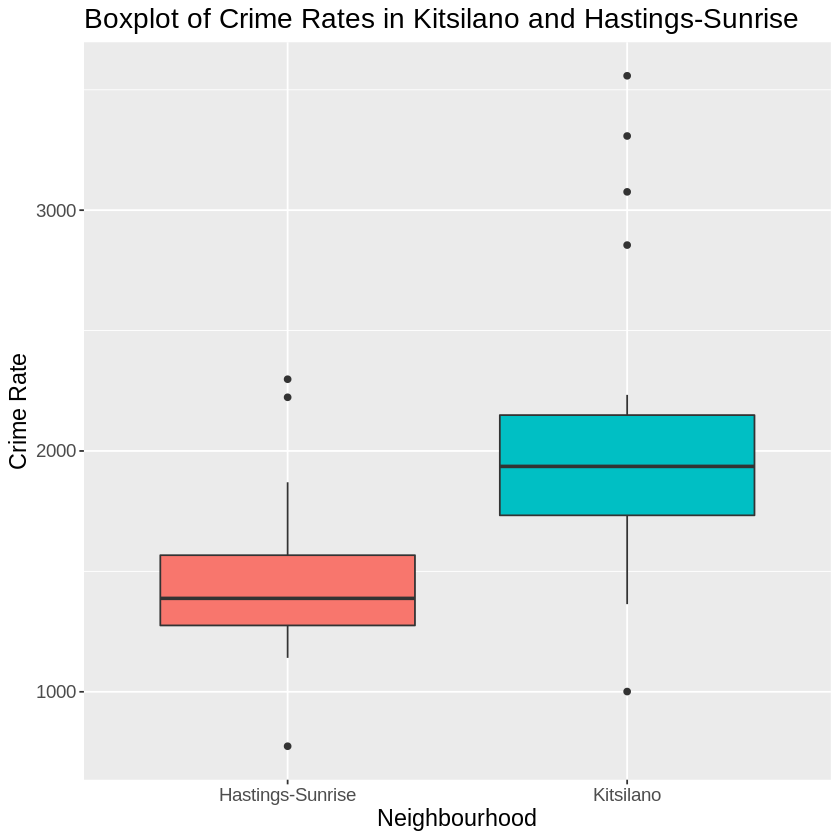

In [146]:
crime_graph <- crime_data_summary %>% 
    ggplot() +
    geom_boxplot(aes(x = NEIGHBOURHOOD, y = n, fill = NEIGHBOURHOOD)) +
    theme(text = element_text(size = 14)) +
    ggtitle("Boxplot of Crime Rates in Kitsilano and Hastings-Sunrise") + 
    xlab("Neighbourhood") + 
    ylab("Crime Rate") + 
    guides(fill = FALSE)
crime_graph

## Methods: Plan

## References

(2022) VPD open data. Available at: https://geodash.vpd.ca/opendata/# (Accessed: October 25, 2022). 

https://bc.ctvnews.ca/is-vancouver-deteriorating-how-public-safety-is-being-debated-in-the-lead-up-to-the-election-1.6103614